In [1]:
# Working of image processing on a randomly selected ward
# 9 Vidyaranyapura ward
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# load the images
map_view = cv2.imread("9 Vidyaranyapura outline.png")
satellite_view = cv2.imread("9 Vidyaranyapura.png")
black = np.zeros(satellite_view.shape).astype(satellite_view.dtype) # balck image with dimensions of input image

In [3]:
grid_RGB1 = cv2.cvtColor(map_view, cv2.COLOR_BGR2RGB)
# Lower and upper limits of red borders
lower_red = np.array([0,15,0])
upper_red = np.array([20,255,255])
grid_HSV1 = cv2.cvtColor(grid_RGB1, cv2.COLOR_RGB2HSV) # Converting to HSV
# finding the colors within the specified boundaries and apply the mask
mask1 = cv2.inRange(grid_HSV1, lower_red, upper_red)

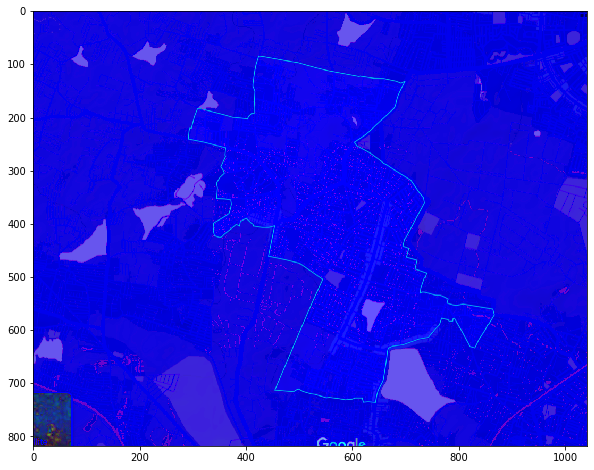

In [4]:
plt.figure(figsize=(20,8))
plt.imshow(grid_HSV1)

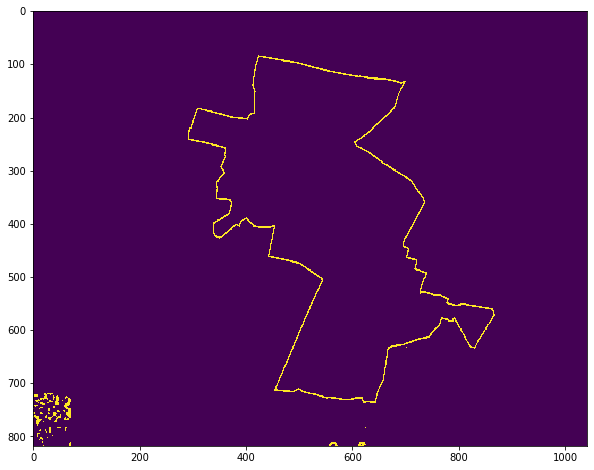

In [5]:
plt.figure(figsize=(20,8))
plt.imshow(mask1)

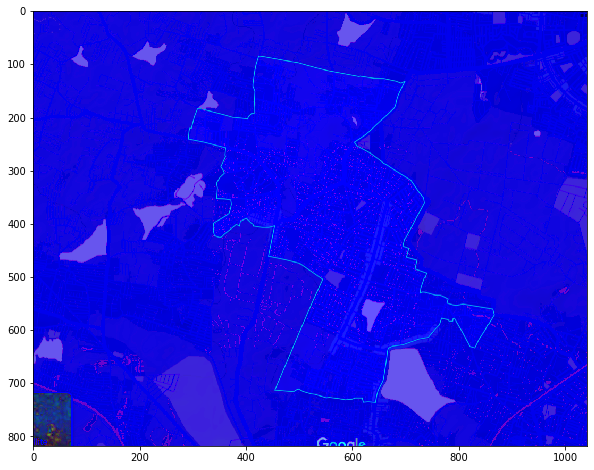

In [6]:
plt.figure(figsize=(20,8))
plt.imshow(grid_HSV1)

In [7]:
# Finding all the contours in the mask
ret,thresh = cv2.threshold(mask1, 40, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Filling the largest contour found with white
if(len(contours)>0):
    cv2.drawContours(black, [max(contours, key = cv2.contourArea)], -1, [255, 255, 255], thickness=3)
    only_ward = cv2.bitwise_and(satellite_view, black)

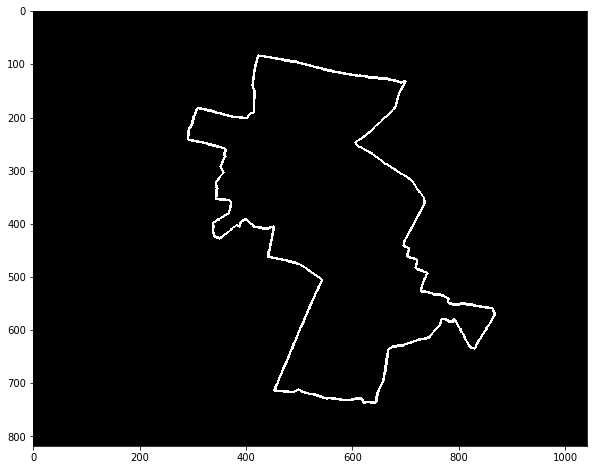

In [8]:
plt.figure(figsize=(20,8))
plt.imshow(black)

In [9]:
# Filling the largest contour found with white
if(len(contours)>0):
    cv2.drawContours(black, [max(contours, key = cv2.contourArea)], -1, [255, 255, 255], thickness=-1)
    only_ward = cv2.bitwise_and(satellite_view, black)
else:
    print("Couldn't find any contours")
    exit()

Area of ward:


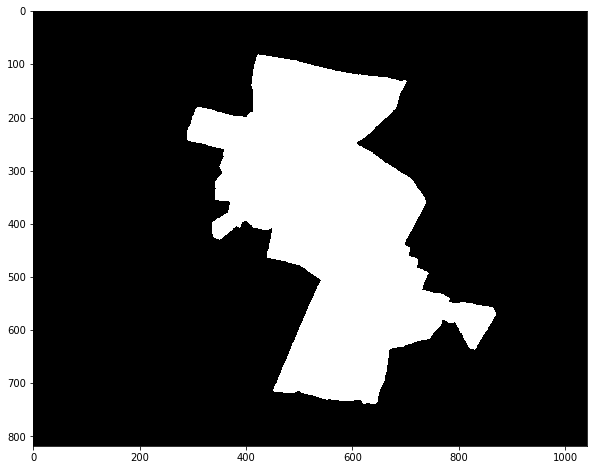

In [10]:
plt.figure(figsize=(20,8))
plt.imshow(black)
print('Area of ward:')

Satellite image:


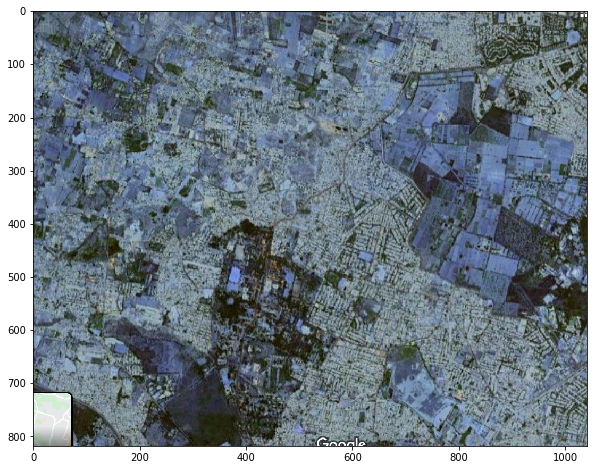

In [11]:
plt.figure(figsize=(20,8))
plt.imshow(satellite_view)
print('Satellite image:')

Satellite image of ward:


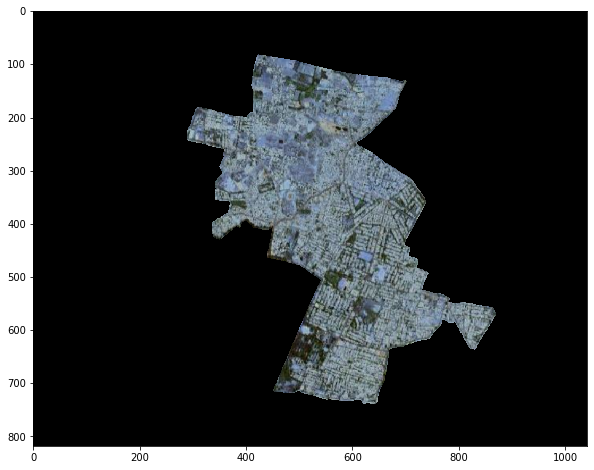

In [12]:
plt.figure(figsize=(20,8))
plt.imshow(only_ward)
print('Satellite image of ward:')

Satellite image of ward after converting to RGB:


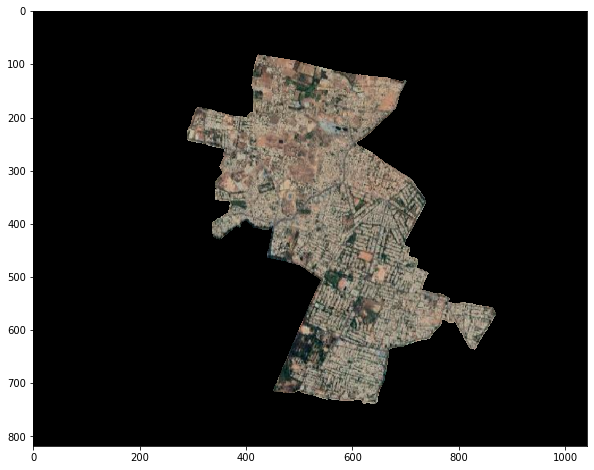

In [13]:
grid_RGB2 = cv2.cvtColor(only_ward, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,8))
plt.imshow(grid_RGB2)
print('Satellite image of ward after converting to RGB:')

In [14]:
grid_HSV2 = cv2.cvtColor(grid_RGB2, cv2.COLOR_RGB2HSV) # Converting to HSV
lower_green = np.array([48,18,0])
upper_green = np.array([179,255,121])
mask2 = cv2.inRange(grid_HSV2, lower_green, upper_green)

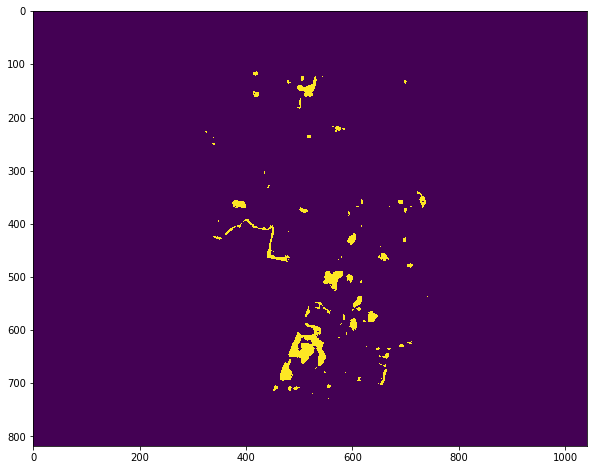

In [15]:
plt.figure(figsize=(20,8))
plt.imshow(mask2)

Green areas in the ward:


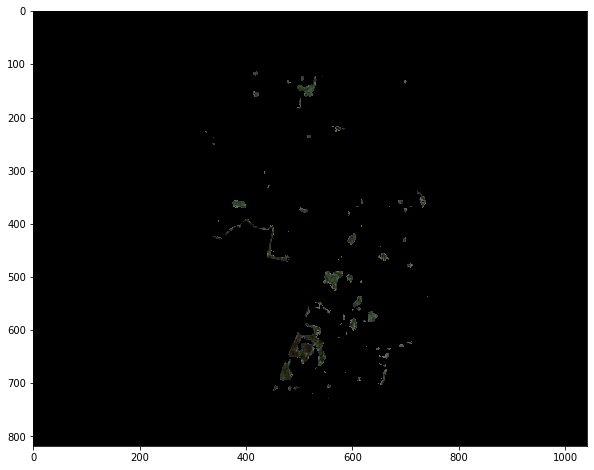

In [16]:
green_in_ward = cv2.bitwise_and(only_ward, only_ward, mask=mask2) # Generating image with the green part
plt.figure(figsize=(20,8))
plt.imshow(green_in_ward)
print('Green areas in the ward:')

Single channel gray image of the ward:


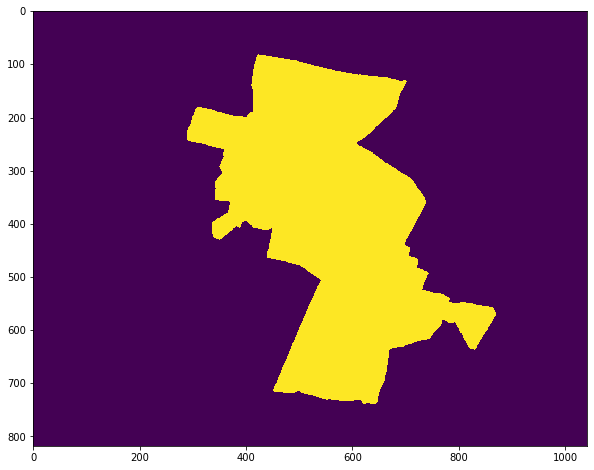

In [17]:
gray1 = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,8))
plt.imshow(gray1)
print('Single channel gray image of the ward:')

Single channel gray image of the green areas in the ward:


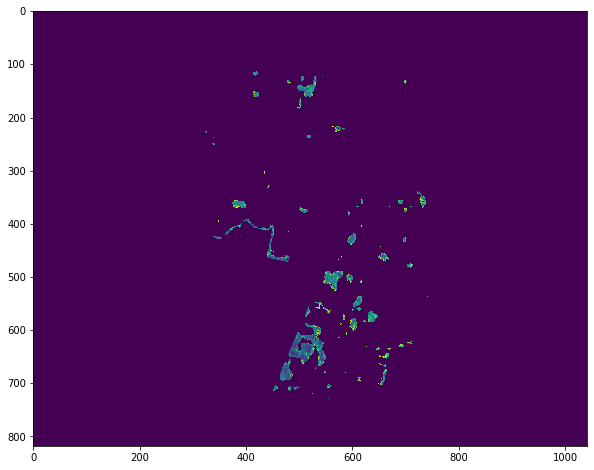

In [18]:
gray2 = cv2.cvtColor(green_in_ward, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,8))
plt.imshow(gray2)
print('Single channel gray image of the green areas in the ward:')

In [19]:
ward_area = cv2.countNonZero(gray1)
green_area = cv2.countNonZero(gray2)
green_percentage = green_area / ward_area * 100
print('Percentage of green area in the ward:', green_percentage, "%")

Percentage of green area in the ward: 5.306739873382262 %
